Histogram


In [1]:
!if [ -d deepul ]; then rm -Rf deepul; fi
!git clone https://github.com/rll/deepul.git 
!unzip -qq deepul/homeworks/hw1/data/hw1_data.zip -d deepul/homeworks/hw1/data/
!pip install ./deepul

Cloning into 'deepul'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 727 (delta 11), reused 13 (delta 3), pack-reused 697
Receiving objects: 100% (727/727), 119.73 MiB | 12.68 MiB/s, done.
Resolving deltas: 100% (322/322), done.
Processing ./deepul
  Created wheel for deepul: filename=deepul-0.1.0-cp36-none-any.whl size=16679 sha256=9c77b5a49e8b4a298d7dbb1f7391dd45908c514b0f3dd327f42e1754958ed022
  Stored in directory: /tmp/pip-ephem-wheel-cache-6aecoq0n/wheels/39/1a/4b/a6f51db275abb2e5dae32540e06ed5011e792f162467bd3aa8
Successfully built deepul


In [0]:
from deepul.hw1_helper import *

Dataset 1


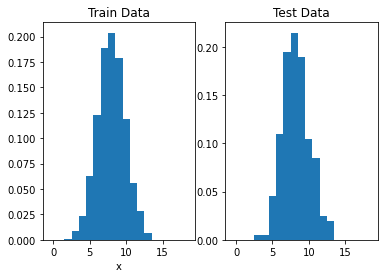

Dataset 2


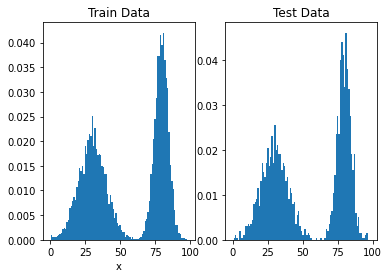

In [3]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

In [0]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [0]:
class Histogram(nn.Module):
  def __init__(self,d):
    super().__init__()
    self.d = d
    self.theta = nn.Parameter(torch.zeros(d), requires_grad=True)

  def forward(self, x):
    return F.cross_entropy(self.theta.unsqueeze(0).repeat(x.shape[0], 1), x)#.detach().cpu().numpy()

  def get_distribution(self):
    return F.softmax(self.theta, dim=0).detach().cpu().numpy()


In [0]:
def train(model, train_loader, test_loader, param):
  train_loss = []
  test_loss = [cal_test_loss(model, test_loader)]
  
  epochs, lr = param['epochs'], param['lr']
  optimizer = optim.Adam(model.parameters(), lr=lr)

  for i in range(epochs):
    train_loss.extend(cal_train_loss(model, train_loader, optimizer))
    test_loss.append(cal_test_loss(model, test_loader))
  return train_loss, test_loss



In [0]:
def cal_train_loss(model, train_loader, optimizer):
  model.train()
  train_loss = []

  for x in train_loader:
    x = x.cuda()
    loss = model.forward(x)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_loss.append(loss.item())
  return train_loss                    
  



In [0]:
def cal_test_loss(model, test_loader):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for x in test_loader:
      x = x.cuda()
      loss = model.forward(x).item()
      total_loss += loss * x.shape[0]
    avg_loss = total_loss / len(test_loader.dataset)

  return avg_loss


In [0]:
def q1_a(train_data, test_data, d, dset_id):
    """
    train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
    test_data: An (n_test,) numpy array of integers in {0, .., d-1}
    d: The number of possible discrete values for random variable x
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
                used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (d,) of model probabilities
    """
    model = Histogram(d).cuda()
    train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = data.DataLoader(test_data, batch_size=128)
    train_loss, test_loss = train(model, train_loader, test_loader, dict(epochs=20, lr=1e-1))
    distribution = model.get_distribution()
    return train_loss, test_loss, distribution

Final Test Loss: 2.0562


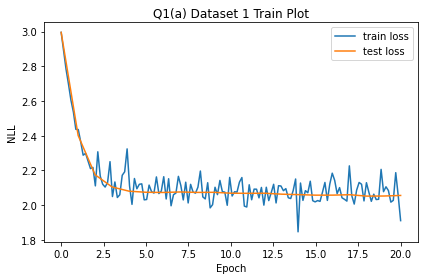

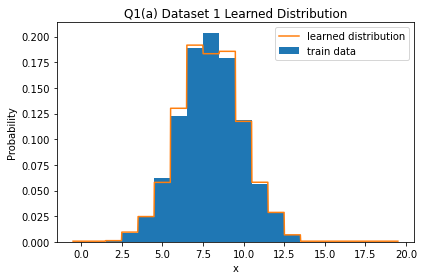

In [90]:
q1_save_results(1, 'a', q1_a)

Final Test Loss: 4.0430


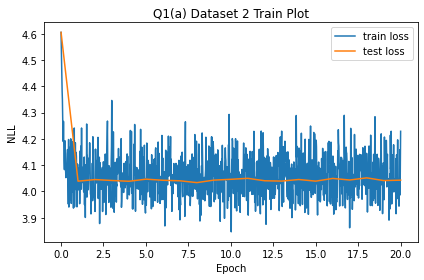

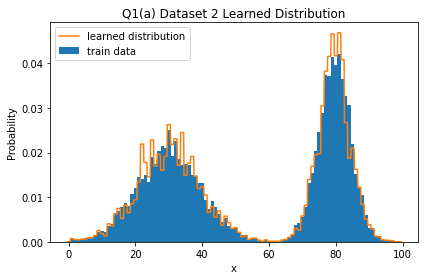

In [92]:
q1_save_results(2, 'a', q1_a)